In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s5e11/sample_submission.csv
/kaggle/input/playground-series-s5e11/train.csv
/kaggle/input/playground-series-s5e11/test.csv


In [2]:
train=pd.read_csv("/kaggle/input/playground-series-s5e11/train.csv")
test=pd.read_csv("/kaggle/input/playground-series-s5e11/test.csv")

In [3]:
train.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade,loan_paid_back
0,0,29367.99,0.084,736,2528.42,13.67,Female,Single,High School,Self-employed,Other,C3,1.0
1,1,22108.02,0.166,636,4593.10,12.92,Male,Married,Master's,Employed,Debt consolidation,D3,0.0
2,2,49566.20,0.097,694,17005.15,9.76,Male,Single,High School,Employed,Debt consolidation,C5,1.0
3,3,46858.25,0.065,533,4682.48,16.10,Female,Single,High School,Employed,Debt consolidation,F1,1.0
4,4,25496.70,0.053,665,12184.43,10.21,Male,Married,High School,Employed,Other,D1,1.0


In [4]:
test.head()

,id,annual_income,debt_to_income_ratio,credit_score,loan_amount,interest_rate,gender,marital_status,education_level,employment_status,loan_purpose,grade_subgrade
0,593994,28781.05,0.049,626,11461.42,14.73,Female,Single,High School,Employed,Other,D5
1,593995,46626.39,0.093,732,15492.25,12.85,Female,Married,Master's,Employed,Other,C1
2,593996,54954.89,0.367,611,3796.41,13.29,Male,Single,Bachelor's,Employed,Debt consolidation,D1
3,593997,25644.63,0.110,671,6574.30,9.57,Female,Single,Bachelor's,Employed,Debt consolidation,C3
4,593998,25169.64,0.081,688,17696.89,12.80,Female,Married,PhD,Employed,Business,C1


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593994 entries, 0 to 593993
Data columns (total 13 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    593994 non-null  int64  
 1   annual_income         593994 non-null  float64
 2   debt_to_income_ratio  593994 non-null  float64
 3   credit_score          593994 non-null  int64  
 4   loan_amount           593994 non-null  float64
 5   interest_rate         593994 non-null  float64
 6   gender                593994 non-null  object 
 7   marital_status        593994 non-null  object 
 8   education_level       593994 non-null  object 
 9   employment_status     593994 non-null  object 
 10  loan_purpose          593994 non-null  object 
 11  grade_subgrade        593994 non-null  object 
 12  loan_paid_back        593994 non-null  float64
dtypes: float64(5), int64(2), object(6)
memory usage: 58.9+ MB


In [6]:
target = "loan_paid_back"

num_cols = [
    "annual_income", "debt_to_income_ratio", "credit_score",
    "loan_amount", "interest_rate"
]

cat_cols = [
    "gender", "marital_status", "education_level",
    "employment_status", "loan_purpose", "grade_subgrade"
]

cols = num_cols + cat_cols

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


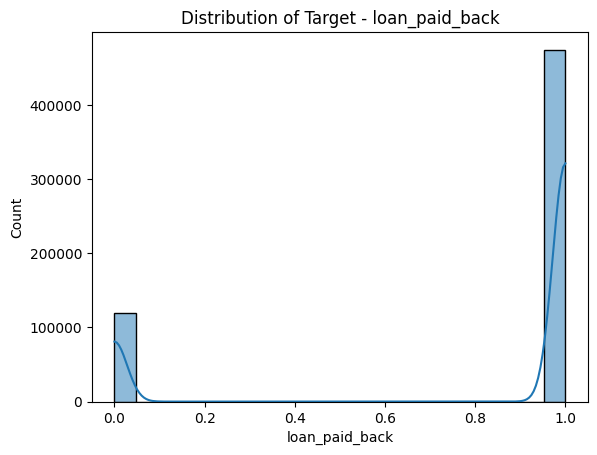

In [8]:
sns.histplot(train[target], kde=True)
plt.title("Distribution of Target - loan_paid_back")
plt.show()

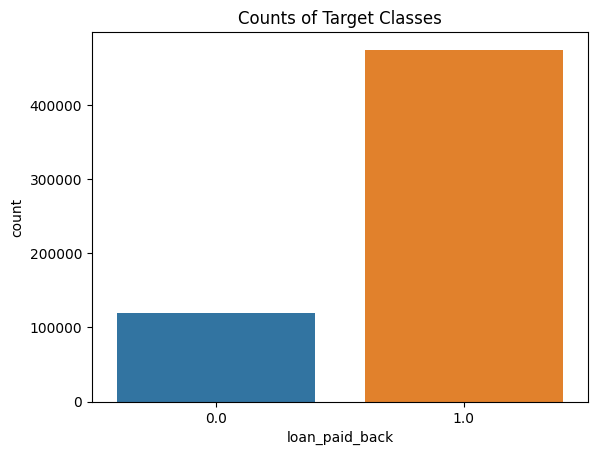

In [9]:
sns.countplot(x=train[target])
plt.title("Counts of Target Classes")
plt.show()

In [10]:
train[target].describe()

count    593994.000000
mean          0.798820
std           0.400883
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max           1.000000
Name: loan_paid_back, dtype: float64

In [11]:
train[num_cols + [target]].corr()[target].sort_values(ascending=False)

loan_paid_back          1.000000
credit_score            0.234560
annual_income           0.006326
loan_amount            -0.003762
interest_rate          -0.131184
debt_to_income_ratio   -0.335680
Name: loan_paid_back, dtype: float64

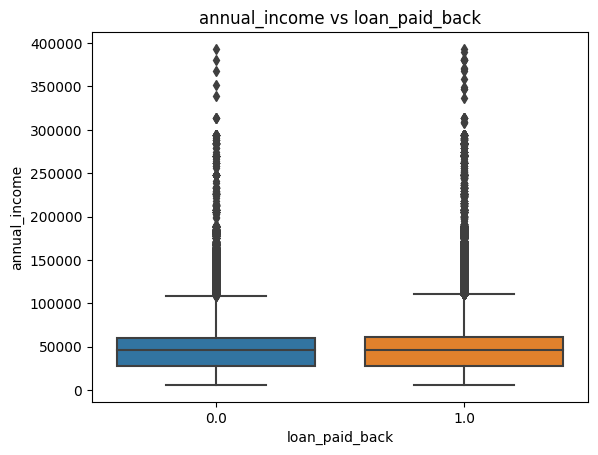

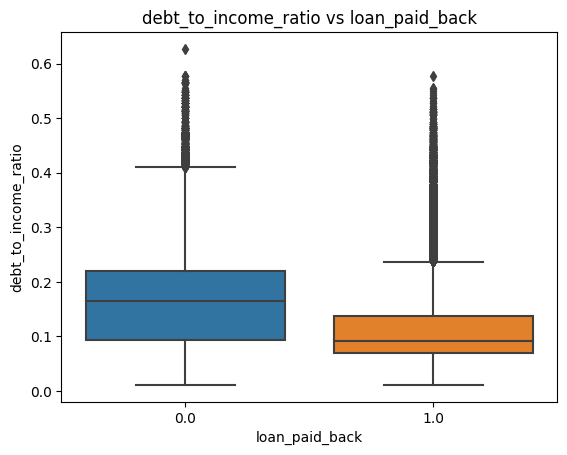

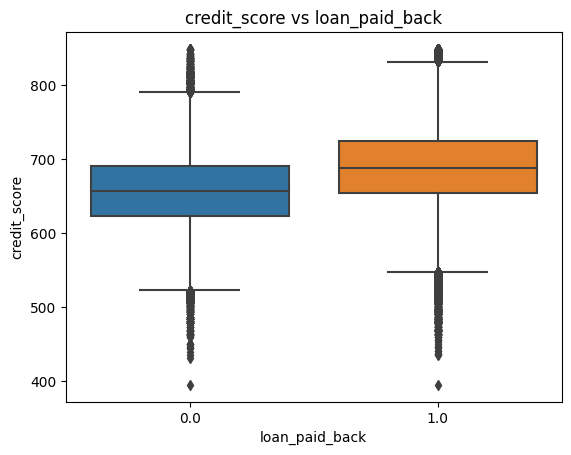

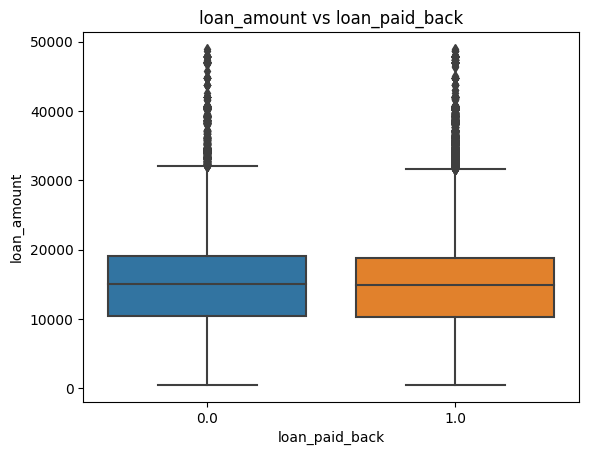

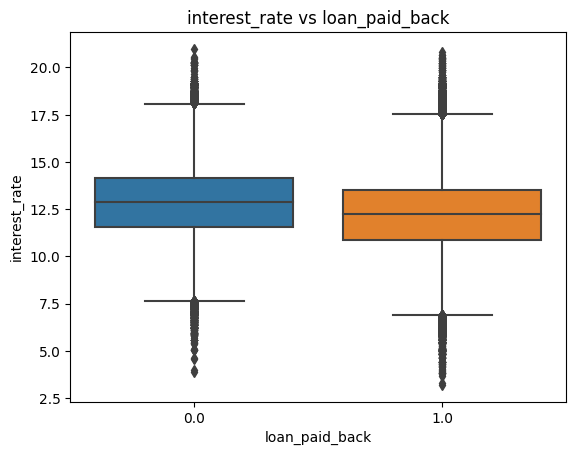

In [12]:
for col in num_cols:
    sns.boxplot(x=train[target], y=train[col])
    plt.title(f"{col} vs {target}")
    plt.show()

In [13]:
for col in cat_cols:
    print(f"\n--- {col} ---")
    print(train.groupby(col)[target].mean().sort_values(ascending=False))


--- gender ---
gender
Female    0.801708
Male      0.795752
Other     0.795333
Name: loan_paid_back, dtype: float64

--- marital_status ---
marital_status
Married     0.799144
Single      0.798873
Divorced    0.796640
Widowed     0.789848
Name: loan_paid_back, dtype: float64

--- education_level ---
education_level
PhD            0.830067
High School    0.809698
Other          0.802789
Master's       0.802346
Bachelor's     0.788892
Name: loan_paid_back, dtype: float64

--- employment_status ---
employment_status
Retired          0.997204
Self-employed    0.898457
Employed         0.894145
Student          0.263515
Unemployed       0.077619
Name: loan_paid_back, dtype: float64

--- loan_purpose ---
loan_purpose
Home                  0.823224
Business              0.813104
Other                 0.802377
Car                   0.800630
Debt consolidation    0.796911
Vacation              0.796071
Medical               0.778085
Education             0.777053
Name: loan_paid_back, dtype: f

In [14]:
train["subgrade"] = train["grade_subgrade"].str[1:].astype(int)
train["grade"]    = train["grade_subgrade"].str[0]
test["subgrade"] = test["grade_subgrade"].str[1:].astype(int)
test["grade"]    = test["grade_subgrade"].str[0]
num_cols = [
    "annual_income", "debt_to_income_ratio", "credit_score",
    "loan_amount", "interest_rate", "subgrade"
]

cat_cols = [
    "gender", "marital_status", "education_level",
    "employment_status", "loan_purpose", "grade"
]

cols = num_cols + cat_cols

In [15]:
train.drop(columns=["grade_subgrade"], inplace=True)
test.drop(columns=["grade_subgrade"], inplace=True)

In [16]:
train[["grade", "subgrade"]].head()

,grade,subgrade
0,C,3
1,D,3
2,C,5
3,F,1
4,D,1


In [17]:
grade_mean = train.groupby("grade")[target].mean()
train["grade_te"] = train["grade"].map(grade_mean)

In [18]:
subgrade_mean = train.groupby("subgrade")[target].mean()
train["subgrade_te"] = train["subgrade"].map(subgrade_mean)

In [19]:
train.drop(columns=["grade", "subgrade"], inplace=True)

In [20]:
num_cols = [
    "annual_income", "debt_to_income_ratio", "credit_score",
    "loan_amount", "interest_rate", "subgrade_te"
]

cat_cols = [
    "gender", "marital_status", "education_level",
    "employment_status", "loan_purpose"
]

cols = num_cols + cat_cols

In [21]:
train[["grade_te", "subgrade_te"]].head()

,grade_te,subgrade_te
0,0.847260,0.787474
1,0.715334,0.787474
2,0.847260,0.801339
3,0.625179,0.805104
4,0.715334,0.805104


In [22]:
test["grade_te"] = test["grade"].map(grade_mean)
test["subgrade_te"] = test["subgrade"].map(subgrade_mean)

In [23]:
X = train[cols]
y = (train[target] >= 0.6).astype(int)

In [24]:
from sklearn.model_selection import train_test_split

import lightgbm as lgb
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier, early_stopping, log_evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from lightgbm import early_stopping, log_evaluation
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [26]:
preprocess = ColumnTransformer([
    ("cat", OneHotEncoder(handle_unknown="ignore"), cat_cols)
], remainder="passthrough")

In [27]:
model = LGBMClassifier(
    n_estimators=500,
    learning_rate=0.0015,
    max_depth=-1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

clf = Pipeline([
    ("prep", preprocess),
    ("model", model)
])

clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 379595, number of negative: 95600
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.026733 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1330
[LightGBM] [Info] Number of data points in the train set: 475195, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798819 -> initscore=1.378932
[LightGBM] [Info] Start training from score 1.378932


Pipeline(steps=[('prep',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['gender', 'marital_status',
                                                   'education_level',
                                                   'employment_status',
                                                   'loan_purpose'])])),
                ('model',
                 LGBMClassifier(colsample_bytree=0.8, learning_rate=0.0015,
                                n_estimators=500, random_state=42,
                                subsample=0.8))])

In [28]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

y_pred = clf.predict(X_test)
y_prob = clf.predict_proba(X_test)[:,1]

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_prob))
print(classification_report(y_test, y_pred))

Accuracy: 0.8974654668810343
AUC: 0.9125568797851195
              precision    recall  f1-score   support

           0       0.96      0.51      0.67     23900
           1       0.89      1.00      0.94     94899

    accuracy                           0.90    118799
   macro avg       0.93      0.75      0.80    118799
weighted avg       0.90      0.90      0.88    118799



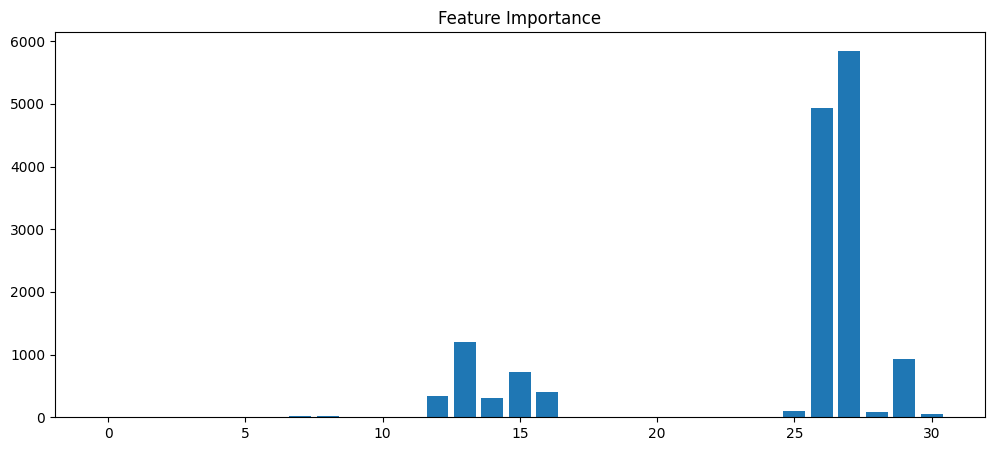

In [29]:
lgb_model = clf.named_steps["model"]
importance = lgb_model.feature_importances_

plt.figure(figsize=(12,5))
plt.bar(range(len(importance)), importance)
plt.title("Feature Importance")
plt.show()

In [30]:
from sklearn.model_selection import RandomizedSearchCV

param_grid = {
    "model__n_estimators": [400,600,800,1000],
    "model__learning_rate": [0.05, 0.03, 0.01],
    "model__max_depth": [-1, 5, 7, 9],
    "model__subsample": [0.7, 0.8, 1.0],
    "model__colsample_bytree": [0.7, 0.8, 1.0]
}

search = RandomizedSearchCV(
    clf,
    param_grid,
    n_iter=20,
    scoring="roc_auc",
    cv=3,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)

best_clf = search.best_estimator_
print(search.best_params_)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Number of positive: 253063, number of negative: 63734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.106289 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the train set: 316797, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.798818 -> initscore=1.378920
[LightGBM] [Info] Start training from score 1.378920
[LightGBM] [Info] Number of positive: 253063, number of negative: 63734
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.058279 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1331
[LightGBM] [Info] Number of data points in the tr

In [31]:
best_clf = search.best_estimator_

# Predict
pred = best_clf.predict_proba(test)[:, 1]

# Create submission
sub = pd.DataFrame({
    "id": test["id"],
    target: pred
})

# Save
sub.to_csv("submission2.csv", index=False)
print("✅ submission2.csv created!")

✅ submission2.csv created!


In [32]:
sub.head()

,id,loan_paid_back
0,593994,0.937368
1,593995,0.980676
2,593996,0.593802
3,593997,0.922073
4,593998,0.961516


In [33]:
sub.mean()

id                721278.000000
loan_paid_back         0.799743
dtype: float64

In [34]:
sub.min()

id                593994.000000
loan_paid_back         0.000155
dtype: float64